In [7]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import pickle

with open("target_array.p", "rb") as fp:
    neighbors, distance = pickle.load(fp)


In [8]:
xin = range(0,np.max(neighbors),2)
yin = range(0,int(np.max(np.ceil(distance))),2)
H, xedges, yedges = np.histogram2d(neighbors, 
                                   distance, 
                                   bins=(xin,yin))
        

<IPython.core.display.Javascript object>


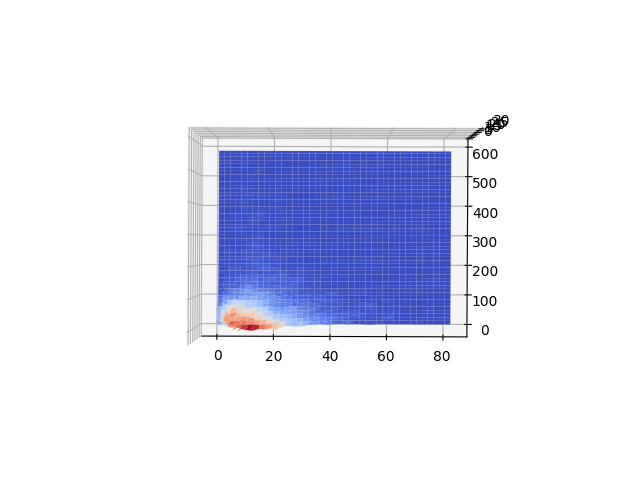

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xpos, ypos = np.meshgrid(xedges[:-1] + 0.5, yedges[:-1] + 0.5)

ax.plot_surface(xpos, ypos, H.T,cmap=cm.coolwarm)

<IPython.core.display.Javascript object>


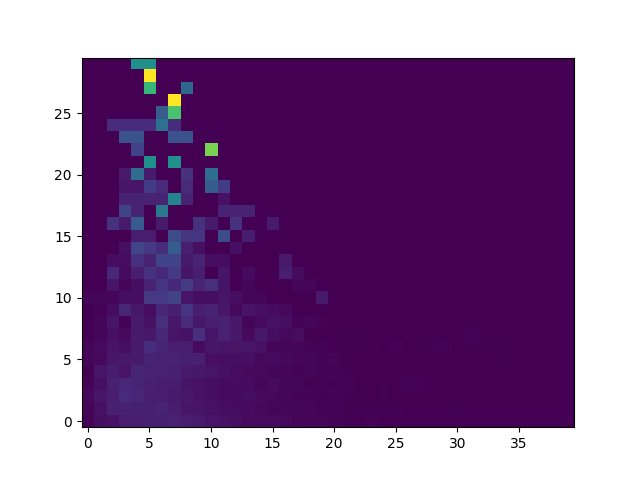

<IPython.core.display.Javascript object>


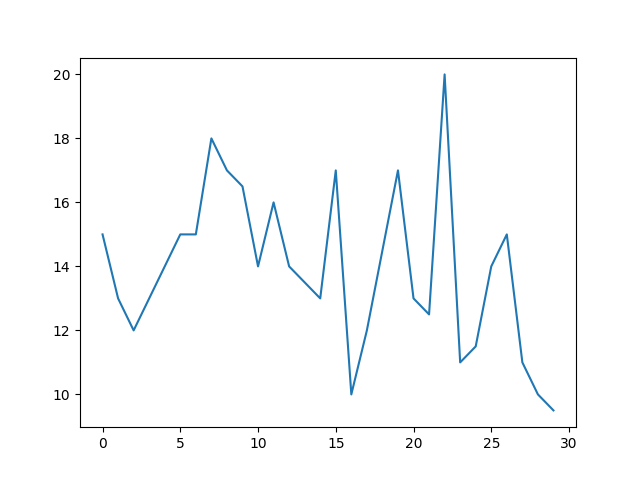

In [36]:
fig = plt.figure()
hist = np.zeros((30,40))
edges = np.zeros((30,41))
meds  =np.zeros((30,1))
for d in range(30):
    current_data = [x for x,y in zip(neighbors, distance) if (y>=d*20) and (y<(d+1)*20)]
    hist[d,:], edges[d,:] = np.histogram(current_data, density=True, bins=range(0,81,2))
    meds[d] = np.median(current_data)

plt.imshow(hist, interpolation='nearest', origin='low')
plt.figure()
plt.plot(meds)